In [1]:
!pip install seaborn
!pip install recbole
!pip install polars

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
all_data = pd.read_csv("sbr_data_1M.csv")

C:\Users\Rabab Azeem\AppData\Local\Temp\ipykernel_4540\196499088.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv("sbr_data_1M.csv")


In [5]:
all_data.head()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,80936,1,0,0,0,1,1,1,4
4,1,781,1,0,0,0,1,1,1,4


In [6]:
all_data.tail()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
38300249,1000016,1354871,1,0,0,0,0,2,0,0
38300250,1000016,1355320,1,0,0,0,0,2,0,0
38300251,1000016,1359738,1,0,0,0,0,1,0,0
38300252,1000016,1365339,1,0,0,0,0,1,0,0
38300253,1000016,92206,1,0,0,0,0,1,0,0


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38300254 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ GB


In [8]:
na_data = all_data.isna().sum()
na_data

user_id           0
item_id           0
click             0
follow            0
like              0
share             0
video_category    0
watching_times    0
gender            0
age               0
dtype: int64

In [9]:
all_data.describe(include='all')

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
count,3.830025e+07,3.830025e+07,38300254.0,3.830025e+07,3.830025e+07,3.830025e+07,38300254,3.830025e+07,3.830025e+07,3.830025e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20136154,NaN,NaN,NaN
mean,4.554379e+05,5.186621e+05,1.0,3.483946e-03,3.982749e-02,4.025404e-03,NaN,1.490779e+00,1.024632e+00,2.041379e+00
std,2.810499e+05,7.545084e+05,0.0,5.892205e-02,1.955537e-01,6.331825e-02,NaN,2.067417e+00,6.404867e-01,1.245085e+00
min,1.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.126300e+05,7.845000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
50%,4.381850e+05,5.652300e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
75%,6.847990e+05,1.353820e+06,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,1.000000e+00,3.000000e+00


In [10]:
# get the number of users in each age group
user_info = all_data.drop_duplicates(subset=["user_id"])
user_info.head()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
71,2,5,1,0,0,0,1,1,1,4
86,3,17,1,0,1,0,0,2,2,2
123,4,44,1,0,0,0,1,1,2,2
150,5,68,1,0,0,0,1,5,1,2


<Axes: ylabel='age'>

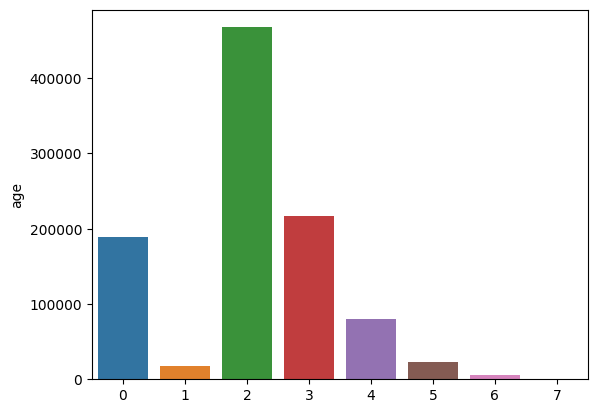

In [11]:
sns.barplot(data=user_info, y=user_info['age'].value_counts(), x=[2, 3, 0, 4, 5, 1, 6, 7])

<Axes: ylabel='gender'>

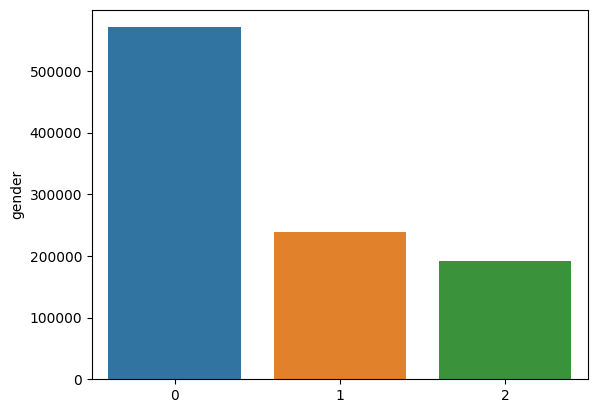

In [12]:
sns.barplot(data=user_info, y=user_info['gender'].value_counts(), x=[0, 1, 2])

In [13]:
user_info.iloc[:,2:]

,click,follow,like,share,video_category,watching_times,gender,age
0,1,0,0,0,1,1,1,4
71,1,0,0,0,1,1,1,4
86,1,0,1,0,0,2,2,2
123,1,0,0,0,1,1,2,2
150,1,0,0,0,1,5,1,2
...,...,...,...,...,...,...,...,...
38300123,1,0,0,0,1,1,0,0
38300180,1,0,0,0,1,1,1,2
38300216,1,0,0,1,1,2,2,2
38300226,1,0,0,0,1,1,1,1


In [14]:
# apparently column 7 has some //N values
user_info["video_category"].unique()

array(['1', '0', '\\N', 1, 0], dtype=object)

In [15]:
user_info.iloc[:,[3, 4, 5, 7, 8]].corr()

,follow,like,share,watching_times,gender
follow,1.000000,0.109139,0.042237,0.015651,-0.013211
like,0.109139,1.000000,0.083474,0.028282,-0.011570
share,0.042237,0.083474,1.000000,0.059094,0.000938
watching_times,0.015651,0.028282,0.059094,1.000000,0.002410
gender,-0.013211,-0.011570,0.000938,0.002410,1.000000


<Axes: >

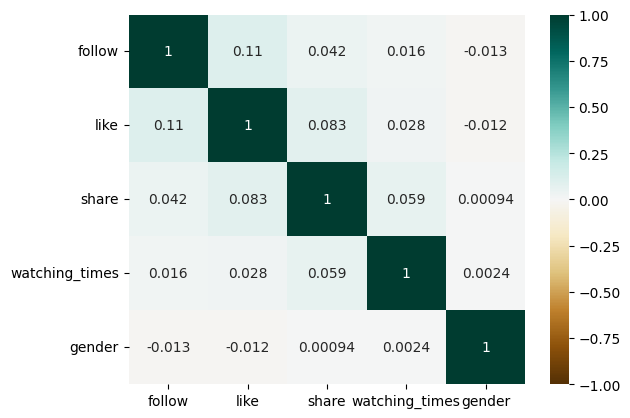

In [16]:
# do correlation plot of some columns
sns.heatmap(data=user_info.iloc[:,[3, 4, 5, 7, 8]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Applying Model

In [17]:
import tqdm
import polars as pl
import random
import os 
import h5py
import sys
import gc

from matplotlib import pyplot as plt

In [18]:
all_data['timestamp'] = all_data.index

mapping = {'user_id':'user_id:token', 'item_id': 'item_id:token', 'timestamp':'timestamp:float'}
all_data = all_data.rename(columns=mapping)

all_data = all_data.drop(columns=['click', 'follow', 'like', 'share', 'video_category', 'gender', 'age', 'watching_times'])
#all_data = all_data.sample(frac =.50)
all_data = all_data.iloc[:1000000, :]
all_data.head()

,user_id:token,item_id:token,timestamp:float
26461519,622720,689,26461519
7154385,158115,556,7154385
25150381,585962,8787,25150381
33237369,821746,1449642,33237369
24945332,580108,1353107,24945332


In [19]:
#!mkdir 'C:/Users/Rabab Azeem/Documents/Coding/CMPE-CISC351/data'

all_data.to_csv('C:/Users/Rabab Azeem/Documents/Coding/CMPE-CISC351/data/data.inter', index=False, sep='\t')

The syntax of the command is incorrect.


In [20]:
import logging
from logging import getLogger
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.sequential_recommender import BERT4Rec, GRU4Rec
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger

from recbole.utils.case_study import full_sort_topk

In [21]:
MAX_ITEM = 20

parameter_dict = {
    'data_path': 'C:/Users/Rabab Azeem/Documents/Coding/CMPE-CISC351/',
    'USER_ID_FIELD': 'user_id',
    'ITEM_ID_FIELD': 'item_id',
    'TIME_FIELD': 'timestamp',
    'user_inter_num_interval': "[5,Inf)",
    'item_inter_num_interval': "[5,Inf)",
    'load_col': {'inter': ['user_id', 'item_id', 'timestamp'], 'item': ['item_id', 'item_emb']},
    'train_neg_sample_args': None,
    'epochs': 10,
    'stopping_step':3,
    'eval_batch_size': 1024,
    #'train_batch_size': 1024,
    #'enable_amp':True,
    'MAX_ITEM_LIST_LENGTH': MAX_ITEM,
    'eval_args': {
        'split': {'RS': [9, 1, 0]},
        'group_by': 'user',
        'order': 'TO',
        'mode': 'full'},
    'shuffle': False
}

config = Config(model='GRU4Rec', dataset='data', config_dict=parameter_dict)

# init random seed
init_seed(config['seed'], config['reproducibility'])

# logger initialization
init_logger(config)
logger = getLogger()

# Create handlers
c_handler = logging.StreamHandler()
c_handler.setLevel(logging.INFO)
logger.addHandler(c_handler)

# write config info into log
logger.info(config)

09 Apr 18:31    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = C:/Users/Rabab Azeem/Documents/Coding/CMPE-CISC351/data
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'none', 'sample_num': 'none', 'alpha': 'none', 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 3
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [9, 1, 0]}, 'group_by': 'user', 'order': 'TO', 'mode': 'full'}
repeatable = True
metrics = ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision']
topk = [10]
valid_metric = MRR@10
valid_metric_bigger = True
eval_batch_size = 1024
metric_decimal_place = 4

Dataset Hyper Para

In [22]:
dataset = create_dataset(config)
logger.info(dataset)

09 Apr 18:35    INFO  data
The number of users: 898425
Average actions of users: 19.828556449961265
The number of items: 273977
Average actions of items: 65.02193987794551
The number of inters: 17814451
The sparsity of the dataset: 99.9927627011101%
Remain Fields: ['user_id', 'item_id', 'timestamp']
data
The number of users: 898425
Average actions of users: 19.828556449961265
The number of items: 273977
Average actions of items: 65.02193987794551
The number of inters: 17814451
The sparsity of the dataset: 99.9927627011101%
Remain Fields: ['user_id', 'item_id', 'timestamp']


In [23]:
# dataset splitting
train_data, valid_data, test_data = data_preparation(config, dataset)

09 Apr 18:40    INFO  [Training]: train_batch_size = [2048] train_neg_sample_args: [{'distribution': 'none', 'sample_num': 'none', 'alpha': 'none', 'dynamic': False, 'candidate_num': 0}]
[Training]: train_batch_size = [2048] train_neg_sample_args: [{'distribution': 'none', 'sample_num': 'none', 'alpha': 'none', 'dynamic': False, 'candidate_num': 0}]
09 Apr 18:40    INFO  [Evaluation]: eval_batch_size = [1024] eval_args: [{'split': {'RS': [9, 1, 0]}, 'group_by': 'user', 'order': 'TO', 'mode': 'full'}]
[Evaluation]: eval_batch_size = [1024] eval_args: [{'split': {'RS': [9, 1, 0]}, 'group_by': 'user', 'order': 'TO', 'mode': 'full'}]


In [ ]:
# model loading and initialization
model = GRU4Rec(config, train_data.dataset).to(config['device'])
logger.info(model)

# trainer loading and initialization
trainer = Trainer(config, model)

# model training
best_valid_score, best_valid_result = trainer.fit(train_data, valid_data)

print(best_valid_score)
print(best_valid_result)